# Precision 과 Recall을 튜닝하는 방법

- 보통 threshold를 바꿔서 강제로 이 수치들을 올릴수 있다
- 하지만 실제로는 이걸 올린다고 해서 성능이 좋아진다고 평가할수는 없다는 의견이 많다
- 어짜피 새로운 데이터들이 쌓이면 threshold의 움직임이 의미가 없기 때문

In [1]:
import pandas as pd 
wine_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/wine.csv'

wine = pd.read_csv(wine_url,sep=',',index_col=0)
wine['taste'] = [1 if quality >5 else 0 for quality in wine['quality']]

X = wine.drop(['taste','quality'],axis=1)
Y = wine.taste

In [2]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color,taste
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1,0


In [3]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=13)

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression(solver='liblinear', random_state=13)
lr.fit(X_train,y_train)

y_pred_tr = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

print('Train Acc:',accuracy_score(y_train,y_pred_tr))
print('Test Acc:',accuracy_score(y_test,y_pred_test))

Train Acc: 0.7425437752549547
Test Acc: 0.7438461538461538


classification_report

In [5]:
from sklearn.metrics import classification_report

print(classification_report(y_test,lr.predict(X_test)))

              precision    recall  f1-score   support

           0       0.68      0.58      0.62       477
           1       0.77      0.84      0.81       823

    accuracy                           0.74      1300
   macro avg       0.73      0.71      0.71      1300
weighted avg       0.74      0.74      0.74      1300



In [6]:
#weighted avg
0.68*(477/1300) + 0.77*(823/1300)

0.7369769230769231

confusion_matrix

In [7]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test,lr.predict(X_test)))

[[275 202]
 [131 692]]


전체 0 중에서 275개는 맞추고 202개는 못찾췄음.
전체 1 중에서 131개는 틀렸고 692개는 맞췄음.

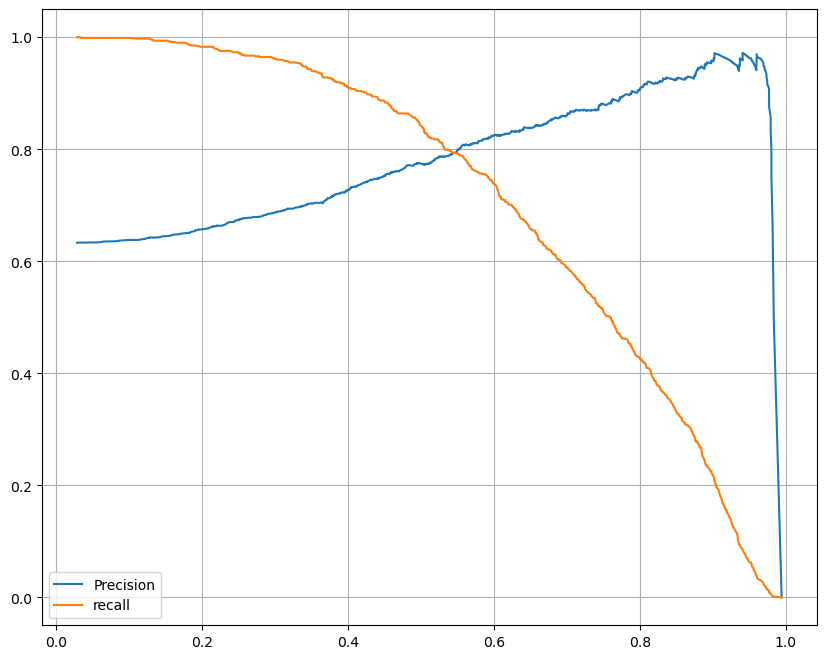

In [9]:
import matplotlib.pyplot as plt 
from sklearn.metrics import precision_recall_curve

plt.figure(figsize=(10,8))
pred = lr.predict_proba(X_test)[:,1]

precision, recall, threshold = precision_recall_curve(y_test,pred)

plt.plot(threshold, precision[:len(threshold)], label='Precision')
plt.plot(threshold, recall[:len(threshold)], label='recall')
plt.legend()
plt.grid()
plt.show()

In [10]:
pred_proba = lr.predict_proba(X_test)
pred_proba[:3]

array([[0.40511422, 0.59488578],
       [0.50942858, 0.49057142],
       [0.1021066 , 0.8978934 ]])

In [11]:
y_pred_test.reshape(-1,1)

array([[1],
       [0],
       [1],
       ...,
       [1],
       [0],
       [1]], dtype=int64)

In [12]:
#pred_proba에 y_pred_test예측값 추가하기
import numpy as np

np.concatenate([pred_proba,y_pred_test.reshape(-1,1)],axis=1)

array([[0.40511422, 0.59488578, 1.        ],
       [0.50942858, 0.49057142, 0.        ],
       [0.1021066 , 0.8978934 , 1.        ],
       ...,
       [0.2253031 , 0.7746969 , 1.        ],
       [0.67385289, 0.32614711, 0.        ],
       [0.31468732, 0.68531268, 1.        ]])

### threshold 바꿔보기 - Binarizer

In [16]:
from sklearn.preprocessing import Binarizer

binarizer = Binarizer(threshold=0.6).fit(pred_proba)
pred_bin = binarizer.transform(pred_proba)[:,1]
pred_bin


array([0., 0., 1., ..., 1., 0., 1.])

In [17]:
from sklearn.metrics import classification_report

print(classification_report(y_test,lr.predict(X_test)))

              precision    recall  f1-score   support

           0       0.68      0.58      0.62       477
           1       0.77      0.84      0.81       823

    accuracy                           0.74      1300
   macro avg       0.73      0.71      0.71      1300
weighted avg       0.74      0.74      0.74      1300



In [18]:
from sklearn.metrics import classification_report

print(classification_report(y_test,pred_bin))

              precision    recall  f1-score   support

           0       0.62      0.73      0.67       477
           1       0.82      0.74      0.78       823

    accuracy                           0.74      1300
   macro avg       0.72      0.73      0.72      1300
weighted avg       0.75      0.74      0.74      1300

